In [21]:
%load_ext autoreload


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
%autoreload 2

In [14]:
import raw.readingfiles as readfiles
from models.ngrams import Ngrams
from util import evaluate, k_fold
from matplotlib import pyplot as plt
import importlib
import numpy as np


In [2]:
data_set = k_fold(10, 'training_data.csv')

## N-gram Model

### Parameter Tweaking

In [27]:
performance = []
for n in range(2,11):
    ngrams_model = Ngrams(n)
    accuracy, perplexity = evaluate(ngrams_model,
                                    data_set[0].training_set,
                                    data_set[0].validation_set)
    performance.append([n,accuracy,perplexity])
    print([n,accuracy,perplexity])

[2, 0.1152, 22951.48523320898]
[3, 0.1764, 143521.12084669698]
[4, 0.1764, 431622.7995401067]
[5, 0.1252, 710802.9769312381]
[6, 0.0828, 868000.7112089177]
[7, 0.0568, 940000.2132040319]
[8, 0.042, 970400.0960488445]
[9, 0.038, 979200.0440359877]
[10, 0.0344, 984800.0279772903]


[[2.00000000e+00 1.15200000e-01 2.29514852e+04]
 [3.00000000e+00 1.76400000e-01 1.43521121e+05]
 [4.00000000e+00 1.76400000e-01 4.31622800e+05]
 [5.00000000e+00 1.25200000e-01 7.10802977e+05]
 [6.00000000e+00 8.28000000e-02 8.68000711e+05]
 [7.00000000e+00 5.68000000e-02 9.40000213e+05]
 [8.00000000e+00 4.20000000e-02 9.70400096e+05]
 [9.00000000e+00 3.80000000e-02 9.79200044e+05]
 [1.00000000e+01 3.44000000e-02 9.84800028e+05]]


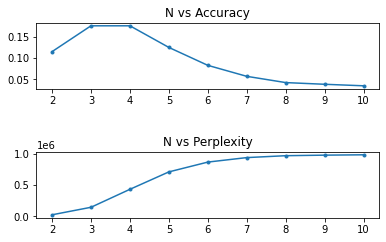

In [28]:
figure = plt.figure()
new_per = np.asarray(performance)
print(new_per)
plt.subplot(211)
plt.plot(new_per[:,0],new_per[:,1],".-")
plt.title('N vs Accuracy')
plt.subplot(212)
plt.plot(new_per[:,0],new_per[:,2],".-")
plt.title('N vs Perplexity')
figure.tight_layout(pad=3.0)
plt.show()